## solution has been separated into three worksheets(notebook).
* classification for Status 12
* classification for Status 24
* Visualization and data distribution

### Key points:

* For classification task ML models e.g. randomforest and logistic is performing best.
* High APR  directly corresponds to chance of Default
* if loan term is high than low the chance of Default
* Self Employed people take bigger loans and default less often than employed.
* default rate is highly related to Original Loan Size
* It seems that chances of defaulting increase if a borrower belongs to a higher tier level, and they have higher avg Loan rate
* There is a correlation between Risk Tier Level and APR, if Risk Tier level increases.
* Borrowers with higher LoanRate seem to default more often

### Area of Improvements:

* Multi label classification can be more benficial, since there is correlation between Status12 and Status24.
* target variable is highly imbalanced(can use SMOTE for oversampling).<br>
#### `Please follow along notebook for better insights`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/root/anaconda3/envs/shopin/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/root/anaconda3/envs/shopin/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/root/anaconda3/envs/shopin/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/root/anaconda3/envs/shopin/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# static data

In [2]:
stat_data=pd.read_excel('./Case-Study 1 Dataset.xlsx',sheet_name='Static Data',date_parser=True,na_values=['NA',' -   ',' NA '])

# performance data
<b>`agg_col`</b>:
    this is the aggregated column that has been made by taking mode across all the months for a given loanID

In [3]:
per_data=pd.read_csv('./agg_performance.csv',na_values=['#NA'])
per_data.head()

,LoanID,Status 12,Status 24,Agg_col
0,1,NaN,NaN,0.0
1,2,0.0,0.0,0.0
2,3,0.0,0.0,0.0
3,4,0.0,0.0,0.0
4,5,0.0,0.0,0.0


In [4]:
main_data=pd.concat(objs=[stat_data,per_data],axis=1)
main_data=main_data.loc[:,~main_data.columns.duplicated()]

main_data=main_data.rename(columns={"Borrower's Employment Status":'Borrower employement status'})

main_data.columns

Index(['Year', 'LoanID', 'Original Loan Size', 'Origination Date',
       'Original Term', 'APR', 'Loan Rate', 'LTV', 'Monthly Instalment',
       'Type 1', 'Type 2', 'Borrower employement status', 'Risk Tier',
       'Exposure At Default', 'Further Recovery Expected Y/N',
       'Recoveries @ 6m', 'Recoveries @ 9m', 'Recoveries @ 12m',
       'Total Recovery', 'Prepayment Amount', 'Status 12', 'Status 24',
       'Agg_col'],
      dtype='object')

In [5]:
main_data['Status 12'].value_counts()
main_data['Status 24'].value_counts()

0.0    11102
1.0     1024
Name: Status 24, dtype: int64

# outlier clipping: 
For all numerical column i am clipping otliers by 99 percentile. 

In [6]:
val_col=[ 'Original Loan Size', 'Original Term', 'APR',
       'Loan Rate', 'LTV', 'Monthly Instalment']

for col in val_col:
    val=main_data[col].quantile([0.99]).as_matrix()[0]
    main_data[col]=[val if i>val else i for i in main_data[col]]

/root/anaconda3/envs/shopin/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [7]:
train_data=main_data[main_data['Status 12'].notnull()]

In [8]:
def_1=train_data[train_data['Status 12']==1]

def_2=train_data[train_data['Status 12']==0].sample(1200)

In [9]:
train_data=pd.concat(objs=[def_1,def_2])
train_data['Status 12'].value_counts()

0.0    1200
1.0    1147
Name: Status 12, dtype: int64

In [10]:
train_data[['Type 1', 'Type 2', 'Borrower employement status', 'Risk Tier']].isnull().sum()

Type 1                         0
Type 2                         0
Borrower employement status    0
Risk Tier                      0
dtype: int64

In [11]:
train_data=train_data.join(pd.get_dummies(train_data[['Type 1','Type 2','Borrower employement status', 'Risk Tier']]))
train_data.columns

Index(['Year', 'LoanID', 'Original Loan Size', 'Origination Date',
       'Original Term', 'APR', 'Loan Rate', 'LTV', 'Monthly Instalment',
       'Type 1', 'Type 2', 'Borrower employement status', 'Risk Tier',
       'Exposure At Default', 'Further Recovery Expected Y/N',
       'Recoveries @ 6m', 'Recoveries @ 9m', 'Recoveries @ 12m',
       'Total Recovery', 'Prepayment Amount', 'Status 12', 'Status 24',
       'Agg_col', 'Type 1_A', 'Type 1_B', 'Type 1_C', 'Type 2_A', 'Type 2_B',
       'Type 2_C', 'Borrower employement status_Employed',
       'Borrower employement status_Other',
       'Borrower employement status_Self-employed', 'Risk Tier_Tier 1',
       'Risk Tier_Tier 2', 'Risk Tier_Tier 3', 'Risk Tier_Tier 4',
       'Risk Tier_Tier 5', 'Risk Tier_Tier 6', 'Risk Tier_Tier 7',
       'Risk Tier_Tier 8', 'Risk Tier_Untiered'],
      dtype='object')

In [12]:
num_col=['Original Loan Size', 'Original Term', 'APR', 'Loan Rate', 'LTV', 'Monthly Instalment', 'Agg_col']
cat_col=[ 'Type 1_A', 'Type 1_B', 'Type 1_C', 'Type 2_A', 'Type 2_B', 'Type 2_C', 'Borrower employement status_Employed', 'Borrower employement status_Other', 'Borrower employement status_Self-employed', 'Risk Tier_Tier 1', 'Risk Tier_Tier 2', 'Risk Tier_Tier 3', 'Risk Tier_Tier 4', 'Risk Tier_Tier 5', 'Risk Tier_Tier 6', 'Risk Tier_Tier 7', 'Risk Tier_Tier 8', 'Risk Tier_Untiered']

In [13]:
train_data[num_col].corr()

,Original Loan Size,Original Term,APR,Loan Rate,LTV,Monthly Instalment,Agg_col
Original Loan Size,1.000000,0.411412,-0.321528,-0.229984,0.185960,0.925641,0.129836
Original Term,0.411412,1.000000,-0.238170,-0.136582,0.246074,0.216434,0.047319
APR,-0.321528,-0.238170,1.000000,0.877256,0.004035,-0.065225,0.232702
Loan Rate,-0.229984,-0.136582,0.877256,1.000000,0.054233,-0.009367,0.228511
LTV,0.185960,0.246074,0.004035,0.054233,1.000000,0.156235,0.165875
Monthly Instalment,0.925641,0.216434,-0.065225,-0.009367,0.156235,1.000000,0.192557
Agg_col,0.129836,0.047319,0.232702,0.228511,0.165875,0.192557,1.000000


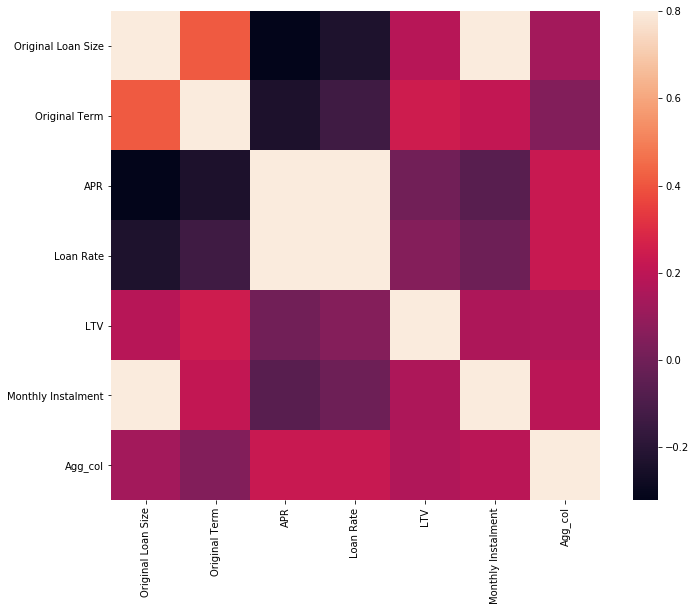

In [14]:
corrmat = train_data[num_col].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

# correlated variables:
* `Original Loan Size` and `Monthly Instalment`
* `APR` and `Loan Rate` 

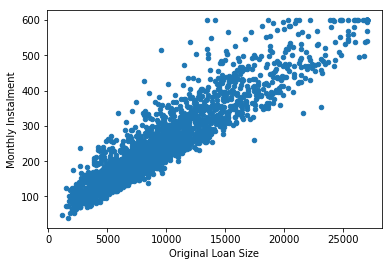

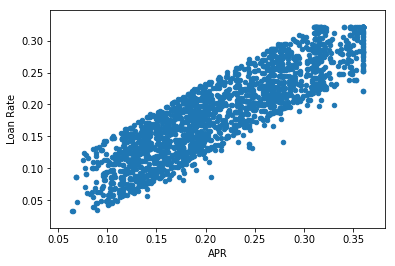

In [15]:
train_data[['Original Loan Size','Monthly Instalment']].plot.scatter(x='Original Loan Size',y='Monthly Instalment')
train_data[['APR','Loan Rate']].plot.scatter(x='APR',y='Loan Rate')

# Bar chart and distribution of all numerical vars for given data

/root/anaconda3/envs/shopin/lib/python3.5/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


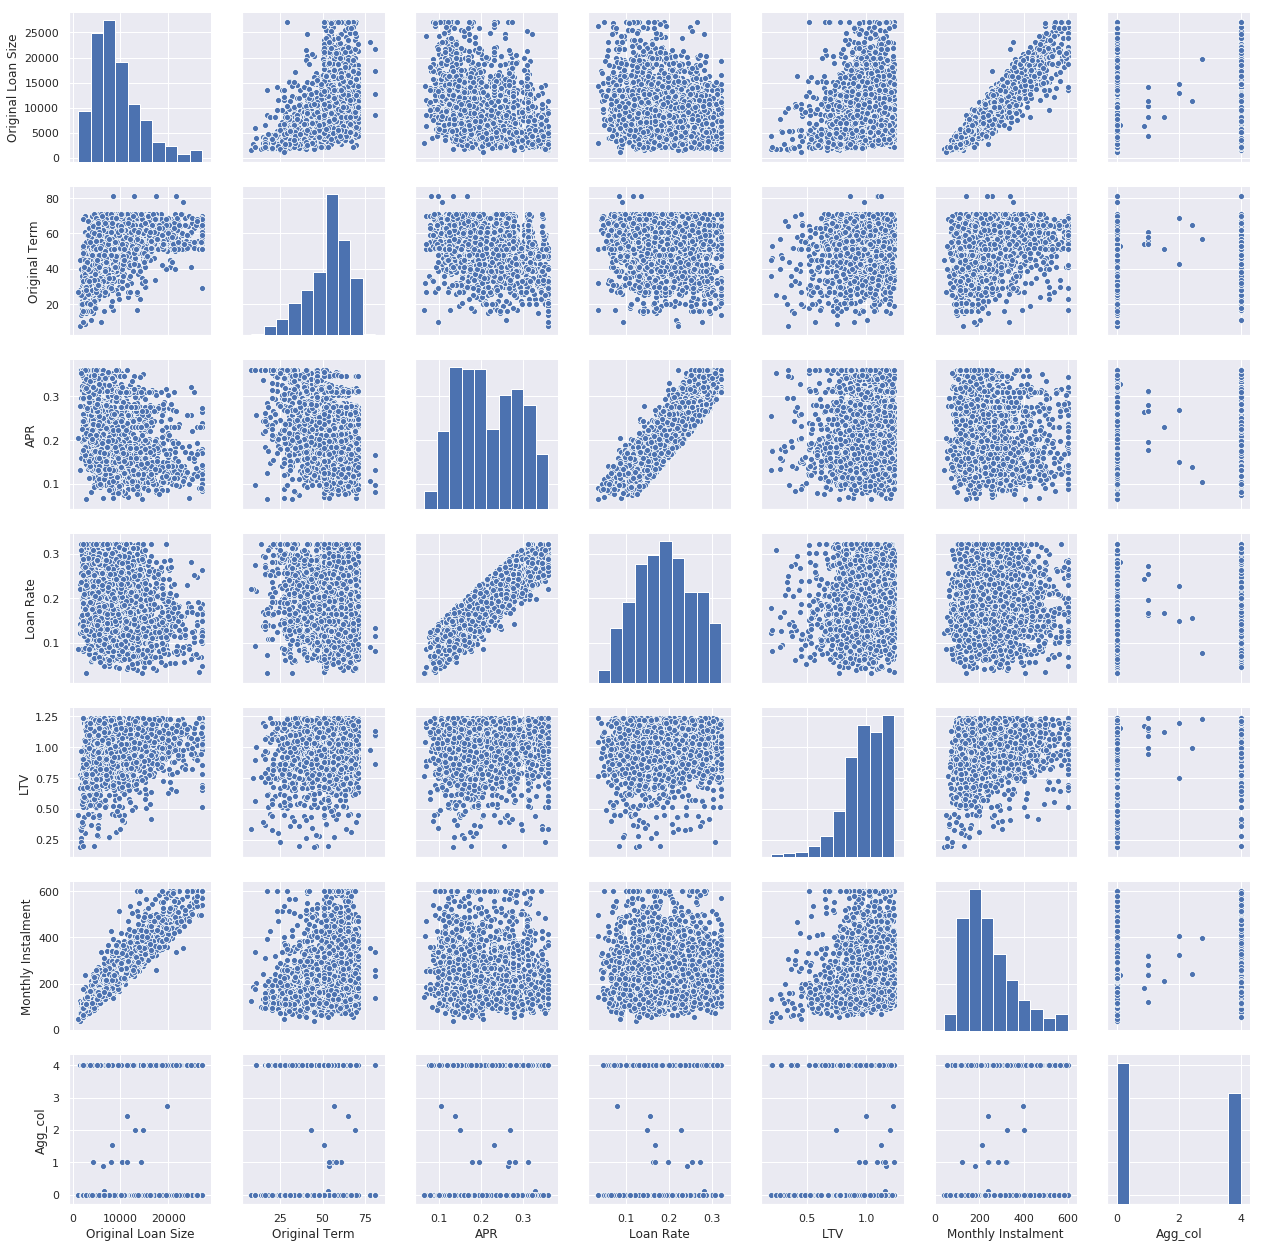

In [16]:
sns.set()
sns.pairplot(train_data[num_col], size = 2.5)
plt.show()

In [17]:
from scipy import stats

(-0.5, 1.5, 0, 28288.440350911613)

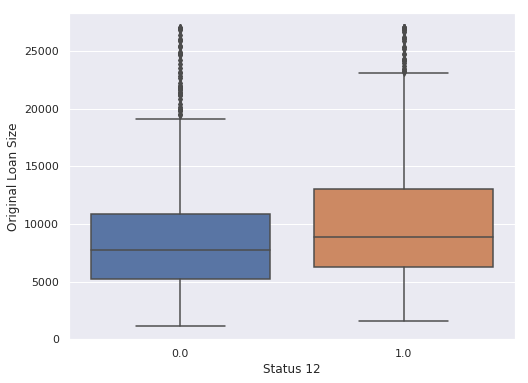

In [21]:
f, ax = plt.subplots(figsize=(8, 6))
data = train_data[['Original Loan Size','Status 12']]

fig = sns.boxplot(x='Status 12',y='Original Loan Size', data=data)
fig.axis(ymin=0,y_max=50000)

/root/anaconda3/envs/shopin/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


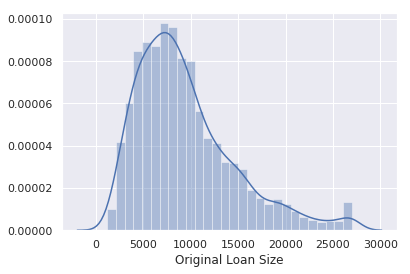

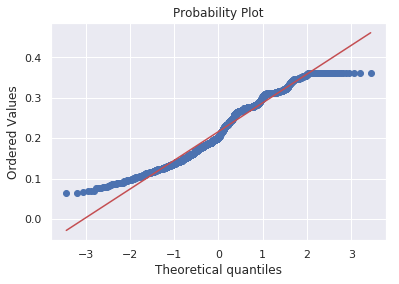

In [18]:
sns.distplot(train_data['Original Loan Size']);
fig = plt.figure()
res = stats.probplot(train_data['APR'], plot=plt)

### `APR` is highest for risk tier 8.

(-0.5, 8.5, 0, 0.3753036619999999)

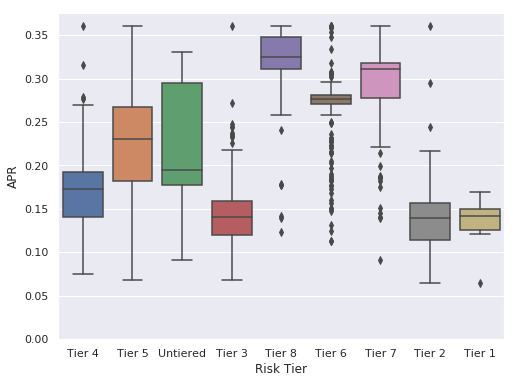

In [19]:
train_data['Risk Tier'].unique()
import seaborn as sns
f, ax = plt.subplots(figsize=(8, 6))
data = train_data[['Risk Tier','APR']]

fig = sns.boxplot(x='Risk Tier', y="APR", data=data)
fig.axis(ymin=0,y_max=50000)

In [ ]:

f, ax = plt.subplots(figsize=(8, 6))
data = train_data[['Borrower employement status_Employed','LTV']]

fig = sns.boxplot(x='Borrower employement status_Employed', y="LTV", data=data)
fig.axis(ymin=0,y_max=50000)

## it seems like APR is unaffected by emplyement status

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
data = train_data[['Borrower employement status_Employed','APR']]

fig = sns.boxplot(x='Borrower employement status_Employed', y="APR", data=data)
fig.axis(ymin=0,y_max=100000)

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(8, 6))
data = train_data[['Status 12','APR']]

fig = sns.boxplot(x='Status 12', y="APR", data=data)
fig.axis(ymin=0,y_max=50000)

# APR of default customer is quite high as comapred to non defaulters

In [ ]:
train_data.columns

In [ ]:
from sklearn import preprocessing
scaled_data=preprocessing.scale(train_data[['Agg_col','Original Loan Size']])
scaled_data.shape

# Applied PCA(with 2 component) to understand data distribution with target class)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(train_data[cat_col+num_col].T)

print('explained variance is : {}'.format(int(sum(pca.explained_variance_ratio_)*100)))

In [ ]:
pca_data=pca.components_.T
pca_data.shape

x_d=pca_data[:,0]
y_d=pca_data[:,1]

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x_d,y_d,c=train_data['Status 12'])

In [ ]:
plot=plt.figure(figsize=(10,10), dpi=300)
ax=plot.add_subplot(111,projection='3d')
ax.scatter(x_d,y_d,pca_data[:,2],c=train_data['Status 12'])

# It is evident from above plot both of these class are not linearly separable

In [ ]:
train_data['Status 12'].value_counts()

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_data, train_data['Status 12'], test_size=0.2, stratify= train_data['Status 12'],random_state=42)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                          ).fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred,digits=4))